<a href="https://colab.research.google.com/github/BrunoSouza724/Codando/blob/main/Backtest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando Bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import seaborn as sns

!pip install pyfolio
import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.8/dist-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Obtendo e tratando os dados

In [ ]:
tickers = ["ITSA4.SA", "SAPR11.SA", "AESB3.SA", "MGLU3.SA", "FLRY3.SA", "LREN3.SA", "TAEE11.SA", "SOJA3.SA", "KLBN4.SA", "PSSA3.SA"]

carteira = web.get_data_yahoo(tickers, period="4y")["Adj Close"]

ibov = web.get_data_yahoo("^BVSP", period="4y")["Adj Close"]

[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
carteira

,AESB3.SA,FLRY3.SA,ITSA4.SA,KLBN4.SA,LREN3.SA,MGLU3.SA,PSSA3.SA,SAPR11.SA,SOJA3.SA,TAEE11.SA
Date,,,,,,,,,,
2019-02-11,NaN,17.970207,9.125310,2.783328,35.824196,5.014904,23.983597,19.272593,NaN,16.949657
2019-02-12,NaN,17.835535,9.278090,2.697687,37.207176,4.998829,25.120350,19.658470,NaN,16.823313
2019-02-13,NaN,17.700867,9.076697,2.692370,36.240761,4.892664,24.111229,19.408316,NaN,16.943008
2019-02-14,NaN,18.029127,9.305870,2.726667,37.207176,5.177488,23.931742,19.623877,NaN,17.122543
2019-02-15,NaN,17.877621,9.187812,2.735242,36.782288,4.973652,23.548834,19.637182,NaN,17.129196
...,...,...,...,...,...,...,...,...,...,...
2023-02-03,10.10,15.110000,8.240000,3.860000,20.260000,4.270000,25.209999,17.230000,11.57,35.730000
2023-02-06,9.97,14.840000,8.250000,3.830000,20.200001,4.130000,25.370001,17.280001,11.49,36.090000
2023-02-07,9.86,15.000000,8.160000,3.870000,19.770000,4.050000,25.500000,17.290001,11.64,35.529999


In [ ]:
ibov

Date
2019-02-11     94413.000000
2019-02-12     96168.000000
2019-02-13     95842.000000
2019-02-14     98015.000000
2019-02-15     97526.000000
                  ...      
2023-02-03    108490.000000
2023-02-06    108456.000000
2023-02-07    107920.000000
2023-02-08    109882.000000
2023-02-09    108008.046875
Name: Adj Close, Length: 995, dtype: float64

In [ ]:
retorno_acumulado = (1 + carteira).cumprod()
retorno_acumulado

,AESB3.SA,FLRY3.SA,ITSA4.SA,KLBN4.SA,LREN3.SA,MGLU3.SA,PSSA3.SA,SAPR11.SA,SOJA3.SA,TAEE11.SA
Date,,,,,,,,,,
2019-02-11,NaN,1.897021e+01,1.012531e+01,3.783328,3.682420e+01,6.014904,2.498360e+01,2.027259e+01,NaN,1.794966e+01
2019-02-12,NaN,3.573140e+02,1.040689e+02,13.989561,1.406949e+03,36.082383,6.525803e+02,4.188007e+02,NaN,3.199224e+02
2019-02-13,NaN,6.682082e+03,1.048670e+03,51.654631,5.239583e+04,212.621374,1.638709e+04,8.547018e+03,NaN,5.740370e+03
2019-02-14,NaN,1.271542e+05,1.080746e+04,192.499628,2.001897e+06,1313.466057,4.085588e+05,1.762726e+05,NaN,1.040301e+05
2019-02-15,NaN,2.400368e+06,1.101044e+05,719.032676,7.563624e+07,7846.189615,1.002964e+07,3.637771e+06,NaN,1.885982e+06
...,...,...,...,...,...,...,...,...,...,...
2023-02-03,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
2023-02-06,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
2023-02-07,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf


Resultados

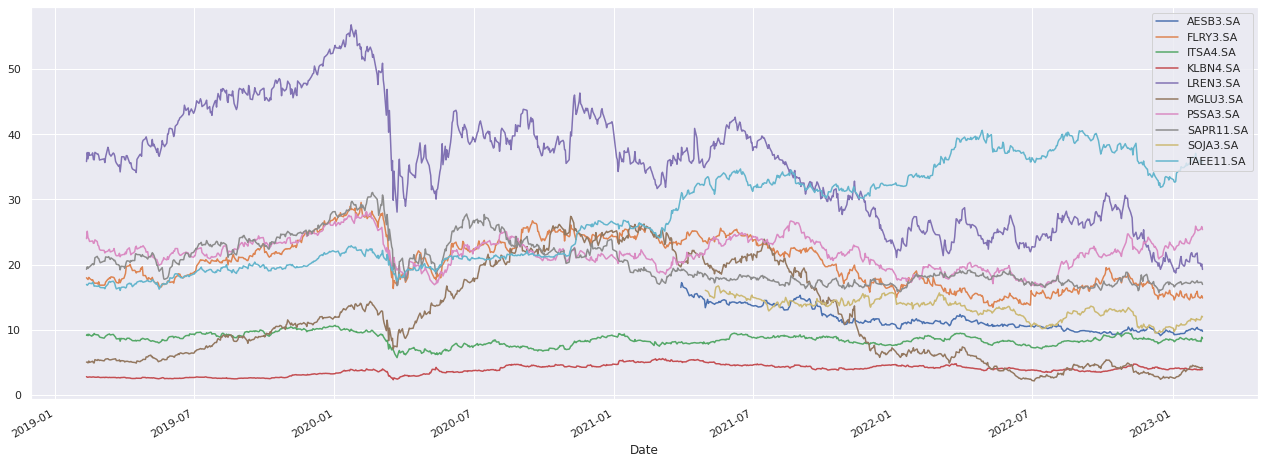

In [ ]:
sns.set()
carteira.plot(figsize=(22,8))

In [ ]:
carteira_normalizada = (carteira / carteira.iloc[0])*10000
carteira_normalizada.dropna(inplace=True)

In [ ]:
carteira_normalizada

,AESB3.SA,FLRY3.SA,ITSA4.SA,KLBN4.SA,LREN3.SA,MGLU3.SA,PSSA3.SA,SAPR11.SA,SOJA3.SA,TAEE11.SA
Date,,,,,,,,,,


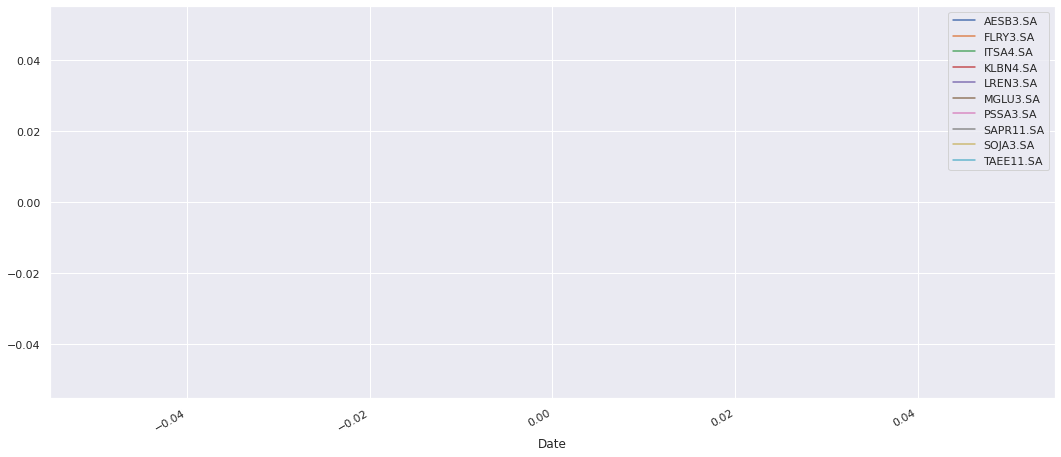

In [ ]:
carteira_normalizada.plot(figsize=(18,8));

In [ ]:
carteira_normalizada["saldo"] = carteira_normalizada.sum(axis=1)

In [ ]:
carteira_normalizada

,AESB3.SA,FLRY3.SA,ITSA4.SA,KLBN4.SA,LREN3.SA,MGLU3.SA,PSSA3.SA,SAPR11.SA,SOJA3.SA,TAEE11.SA,saldo
Date,,,,,,,,,,,


In [ ]:
ibov_normalizado = (ibov / ibov.iloc[0])*160000
ibov_normalizado

Date
2019-02-11    160000.000000
2019-02-12    162974.166693
2019-02-13    162421.700401
2019-02-14    166104.244119
2019-02-15    165275.544681
                  ...      
2023-02-03    183856.036775
2023-02-06    183798.417591
2023-02-07    182890.068105
2023-02-08    186215.033947
2023-02-09    183039.279548
Name: Adj Close, Length: 995, dtype: float64

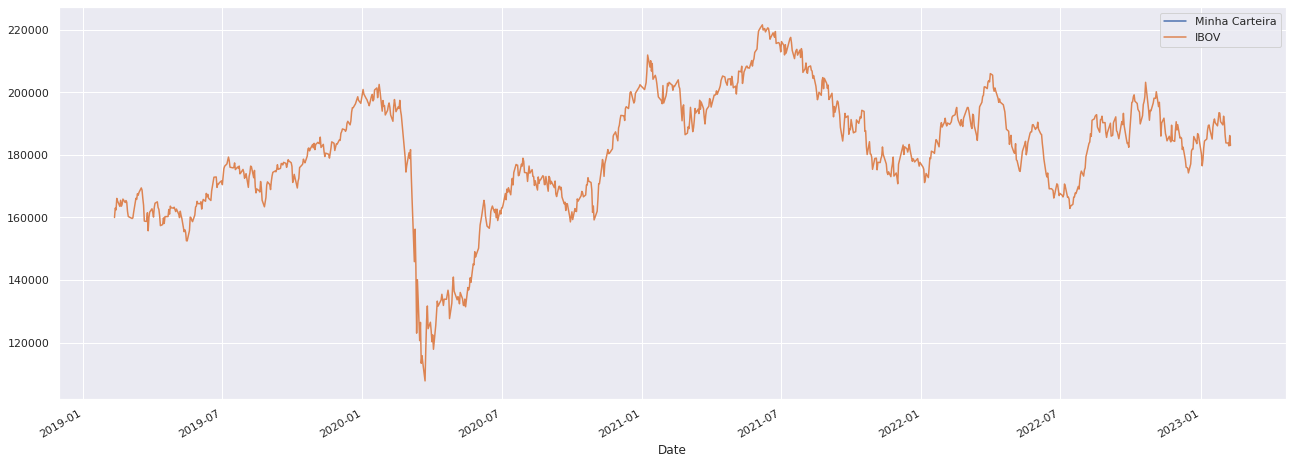

In [ ]:
carteira_normalizada["saldo"].plot(figsize=(22,8), label="Minha Carteira")
ibov_normalizado.plot(label="IBOV")
plt.legend()